# US Accidents Exploratory Data Analysis

We're working with a dataset from kaggle called us_accidents.csv

In [1]:
# We'll need to import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./US_Accidents_Dec20_updated.csv')
df.head(5)
len(df)

1516064

## Data cleaning and preparation

In [3]:
# I want to take a look at the columns we have to work with
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Let's see the types of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.select_dtypes(['float','int32','int64']).columns  # Select columns where the data type is in the array
len(df.select_dtypes(['float','int32','int64']).columns)

14

From the data set, there are 14 numeric columns

In [6]:
df.isna().sum()  # This returns the number of null values for each column

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [7]:
number_of_na = df.isna().sum().sort_values(ascending=False)

<AxesSubplot:>

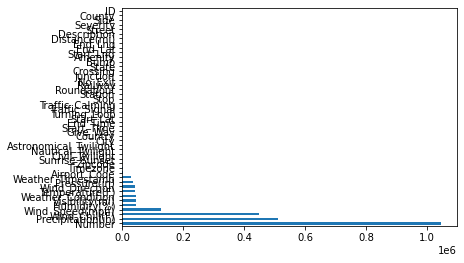

In [8]:
number_of_na.plot(kind='barh')

The plot is a little messy. We could remove the columns that have 0 missing data

<AxesSubplot:>

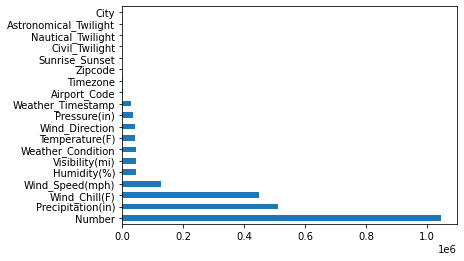

In [9]:
number_of_na[number_of_na > 0].plot(kind='barh')

I'd like to find the percentage of data that is missing relative to the total data entries

In [10]:
np.round((number_of_na / len(df)) * 100)

Number                   69.0
Precipitation(in)        34.0
Wind_Chill(F)            30.0
Wind_Speed(mph)           8.0
Humidity(%)               3.0
Visibility(mi)            3.0
Weather_Condition         3.0
Temperature(F)            3.0
Wind_Direction            3.0
Pressure(in)              2.0
Weather_Timestamp         2.0
Airport_Code              0.0
Timezone                  0.0
Zipcode                   0.0
Sunrise_Sunset            0.0
Civil_Twilight            0.0
Nautical_Twilight         0.0
Astronomical_Twilight     0.0
City                      0.0
Country                   0.0
Give_Way                  0.0
Start_Time                0.0
End_Time                  0.0
Start_Lat                 0.0
Turning_Loop              0.0
Traffic_Signal            0.0
Traffic_Calming           0.0
Stop                      0.0
Station                   0.0
Roundabout                0.0
Railway                   0.0
No_Exit                   0.0
Junction                  0.0
Crossing  

From the result, a significant portion of the number column has a lot of missing data. I beleive we can drop that

In [11]:
df.drop(columns='Number',inplace=True,axis=1)

In [12]:
df['Start_Time'].dtype

dtype('O')

The type is a string, we need to convert the time to a valid format to work with

In [13]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [14]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

I want to select the columns that i feel i can extract some information from

<AxesSubplot:>

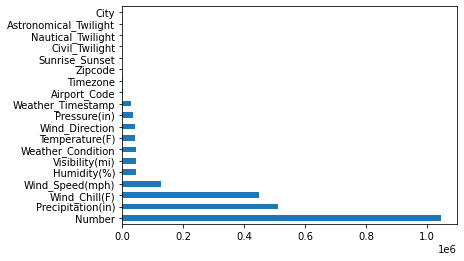

In [15]:
number_of_na[number_of_na > 0].plot(kind='barh')

### Columns i'm concerned with
- City
- Temperature
- Weather_Condition
- Visibility
- Humidity
- Precipitation
- Start_Time
- End_Time
- Bump
- Crossing
- Give_Way
- Junction
- No_Exit
- Railway
- Severity

In [16]:
# A new dataframe containing the columns i'm concerned with
new_df = df[['Start_Time', 'End_Time','Severity','City','State','Country','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Weather_Condition','Visibility(mi)','Humidity(%)','Precipitation(in)',]].copy()

In [17]:
len(new_df.columns)

16

In [18]:
new_df.head()

,Start_Time,End_Time,Severity,City,State,Country,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Weather_Condition,Visibility(mi),Humidity(%),Precipitation(in)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,3,Dublin,OH,US,False,False,False,False,False,False,Light Rain,10.0,58.0,0.00
1,2016-02-08 05:56:20,2016-02-08 11:56:20,2,Dayton,OH,US,False,False,False,False,False,False,Light Rain,10.0,91.0,0.02
2,2016-02-08 06:15:39,2016-02-08 12:15:39,2,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
3,2016-02-08 06:15:39,2016-02-08 12:15:39,2,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
4,2016-02-08 06:51:45,2016-02-08 12:51:45,2,Akron,OH,US,False,False,False,False,False,False,Overcast,10.0,55.0,NaN


## What cities has had the most accident?

### City

In [19]:
new_df['City'].nunique()

10657

The are over 10k cities, we could solve this using a group by

In [20]:
new_df['City'].value_counts()

Los Angeles                     39984
Miami                           36233
Charlotte                       22203
Houston                         20843
Dallas                          19497
                                ...  
Manzanita                           1
West Brooklyn                       1
Garfield Heights                    1
Belding                             1
American Fork-Pleasant Grove        1
Name: City, Length: 10657, dtype: int64

In [21]:
accidents_per_city = new_df['City'].value_counts()

In [22]:
accidents_per_city.head()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

#### Los Angeles, Miami, Charlotte, Houston and Dallas have the higest number of accidents

## Which State has the most cities with the top 100 accidents ?

In [23]:
# I want to get a unique pair of states and city

state_and_city = new_df[['State','City']].values
state_and_city = list(map(lambda x: tuple(x),state_and_city))
state_and_city = set(state_and_city)

In [24]:
# Then I took it back to a dataframe
state_and_city = pd.DataFrame(state_and_city,columns=['State','City'])

In [25]:
state_city_and_acc = pd.merge(accidents_per_city,state_and_city,left_index=True,right_on='City',).drop(columns=['City_y'],axis=1).reset_index()
state_city_and_acc.rename(columns = {'City_x':'nos accidents'},inplace=True)
state_city_and_acc.head()

,index,City,nos accidents,State
0,769,Los Angeles,39984,CA
1,6440,Miami,36233,FL
2,11715,Miami,36233,OK
3,12748,Miami,36233,AZ
4,1010,Charlotte,22203,IA


In [26]:
state_city_and_acc.drop(columns='index',inplace=True)

I saw that Miami city had more than one state in the dataset, so i'm identifying and dropping them

In [27]:
index = state_city_and_acc.loc[(state_city_and_acc.City=='Miami') & (state_city_and_acc.State != 'FL')].index

In [28]:
state_city_and_acc.drop(index,inplace=True)

In [29]:
# I want to test to ensure that each city belongs to only one state
state_city_and_acc['City'].value_counts()[state_city_and_acc['City'].value_counts() > 1]

Franklin       20
Springfield    19
Clinton        19
Jackson        19
Greenville     18
               ..
Roselle         2
Johnston        2
Sunset          2
Hinsdale        2
Rome            2
Name: City, Length: 1995, dtype: int64

Whoa, seems like things are more problematic than i thought, about 2k cities have multiple states. We're going to require another dataset

In [30]:
# I got an external dataset to help in making the states information valid
# url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'
ext_state_and_city = pd.read_csv('./us_cities_states_counties.csv',delimiter='|')
ext_state_and_city = ext_state_and_city[['State short','City']]
len(ext_state_and_city)

63211

#### When I get access to a more powerful laptop, I'd like to eliminate the rows with cities having false states. But for now, my lappy can't handle it

In [31]:
# I had to get unique pairs of states and city from the eternal dataset
ext_state_and_city = list(map(lambda x: tuple(x),ext_state_and_city.values))
ext_state_and_city = set(ext_state_and_city)
ext_state_and_city = pd.DataFrame(ext_state_and_city,columns=['State short','City'])

In [32]:
ext_state_and_city

,State short,City
0,IL,Milford
1,OH,Harrod
2,CO,Silverton
3,IA,Rome
4,AR,Mountain Pine
...,...,...
29856,IN,Stilesville
29857,AR,Sims
29858,ID,North Fork
29859,MD,Laurel


In [33]:
state_city_and_acc.head()

,City,nos accidents,State
0,Los Angeles,39984,CA
1,Miami,36233,FL
4,Charlotte,22203,IA
5,Charlotte,22203,MI
6,Charlotte,22203,TN


In [34]:
# Doing a merge on both datasets
final_state_city_df = pd.merge(state_city_and_acc,ext_state_and_city, left_on=['City','State'],right_on=['City','State short']).drop('State short',axis=1)

#### The final result

In [35]:
sorted_df = final_state_city_df.sort_values(by='nos accidents',ascending=False)[:100]
sorted_df.groupby(by='State').size().sort_values(ascending=False)

State
OR    7
CA    7
IN    6
IL    6
NC    5
MN    5
FL    4
GA    4
TX    4
MI    4
TN    3
IA    3
KY    3
PA    3
ME    3
AR    3
NY    2
OH    2
NJ    2
MO    2
MS    2
VA    2
CT    2
VT    2
AZ    2
MD    2
UT    1
RI    1
AL    1
OK    1
NV    1
NM    1
LA    1
KS    1
CO    1
WV    1
dtype: int64

#### From the result above, Oregon (OR), California (CA), Indiana (IN), Illinois (IL), North Carolina (NC), Minnesota (MN) has the highest amount of accidents

## Question
1. We could see if population has an impact on the number of accidents
2. What time of the day does most accidents occur


### What weather condition did most LA accidents occur?

In [36]:
new_df.query("City == 'Los Angeles'")['Weather_Condition'].value_counts()

Fair                     18075
Clear                     7304
Cloudy                    3173
Partly Cloudy             2699
Mostly Cloudy             2166
Haze                      2008
Overcast                  1438
Light Rain                1111
Scattered Clouds           462
Rain                       346
Heavy Rain                 294
Fog                        262
Smoke                      225
Mist                        26
Fair / Windy                 6
T-Storm                      6
Blowing Dust                 5
Light Drizzle                4
Patches of Fog               4
Heavy T-Storm                3
Partly Cloudy / Windy        2
Light Rain / Windy           2
Shallow Fog                  2
Mostly Cloudy / Windy        1
Thunder                      1
Thunderstorm                 1
Name: Weather_Condition, dtype: int64

From the data above, Most accidents occur Calm weathers than in Harsh weathers

I'd like to visulize the trend on a graph

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

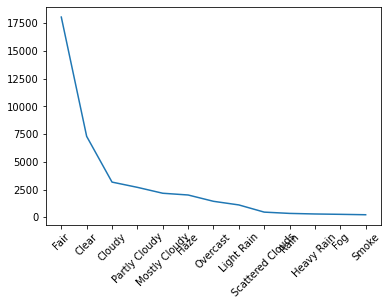

In [37]:
la_acc_weather = new_df.query("City == 'Los Angeles'")['Weather_Condition'].value_counts()
# la_acc_weather.plot(kind='hist')
plt.plot(la_acc_weather[la_acc_weather > 200])
plt.xticks(rotation=45)
# plt.tight_layout()

<AxesSubplot:>

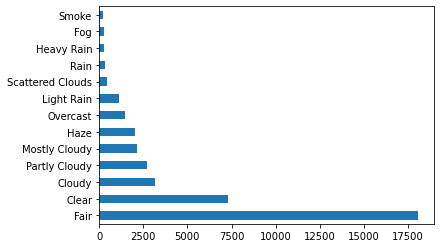

In [38]:
la_acc_weather[la_acc_weather > 100].plot(kind='barh')

The graphs depict the same, the worse the weather, the lower the accidents

#### Is there a trend ?

In [39]:
miami_acc = new_df.query("City == 'Miami'")['Weather_Condition'].value_counts()
miami_acc

Mostly Cloudy                   9474
Fair                            9109
Partly Cloudy                   5667
Cloudy                          3403
Light Rain                      1825
Clear                           1549
Scattered Clouds                1521
Overcast                         642
Rain                             478
Mostly Cloudy / Windy            401
Thunder                          220
Heavy Rain                       198
Fair / Windy                     190
Thunder in the Vicinity          185
Partly Cloudy / Windy            157
T-Storm                          125
Cloudy / Windy                   120
Fog                              104
Thunderstorm                      74
Light Rain / Windy                68
Light Thunderstorms and Rain      61
Light Rain with Thunder           55
Heavy T-Storm                     50
Heavy Thunderstorms and Rain      32
Haze                              32
Heavy Rain / Windy                19
Thunderstorms and Rain            18
R

<AxesSubplot:>

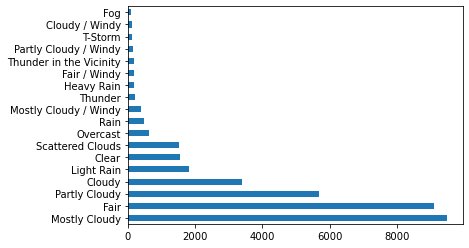

In [40]:
miami_acc = new_df.query("City == 'Miami'")['Weather_Condition'].value_counts()
miami_acc[miami_acc > 100].plot(kind='barh')

A similar trend seems to take place in miami, with this we can conclude that most people as less likely to go out when the wether is bad, than when the weather is clear.

From the columns in the data, we don't have the number of traffic, but we do have a traffic_calming column

In [41]:
with pd.option_context('display.max_rows',None):
    display(df.sample(100)) # display is a better alternative to print(), in order to preseve table styles

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1369224,A-4092567,2,2018-01-09 16:29:29,2018-01-09 22:29:29,47.082482,-122.188617,47.081860,-122.185955,0.132,Between Calistoga St and S Prairie Rd E - Acci...,...,False,False,False,False,False,False,Day,Day,Day,Day
439808,A-3159309,2,2020-12-09 08:52:01,2020-12-09 10:28:02,32.837451,-96.696560,32.837857,-96.697019,0.039,Incident on S SELVA DR near ANGORA ST Drive wi...,...,False,False,False,False,False,False,Day,Day,Day,Day
983564,A-3706891,2,2020-01-30 17:42:00,2020-01-30 18:35:41,44.973900,-93.249680,44.973900,-93.249680,0.000,At I-94/11th Ave/Exit 17B - Accident.,...,False,False,False,False,False,False,Night,Day,Day,Day
722836,A-3446093,2,2020-05-26 13:27:00,2020-05-26 14:30:00,40.130290,-111.647440,40.130290,-111.647440,0.000,Ramp to I-15 Northbound - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
717110,A-3440352,2,2020-12-24 02:04:00,2020-12-24 03:44:50,34.014691,-117.550503,34.006151,-117.550503,0.590,Incident on I-15 SB near CANTU GALLEANO RANCH ...,...,False,False,False,False,False,False,Night,Night,Night,Night
829489,A-3552768,2,2020-06-15 12:57:56,2020-06-15 13:12:56,28.451840,-81.170540,28.451650,-81.203560,2.006,At Bee Line Main Toll Plaza - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
586783,A-3308385,2,2020-10-05 20:52:40,2020-10-05 23:03:13,42.862967,-73.781684,42.862844,-73.781002,0.036,Crash on NY 146 eastbound at Clifton Country R...,...,False,False,False,False,False,False,Night,Night,Night,Night
311435,A-3029120,2,2020-09-30 09:50:00,2020-09-30 22:21:04,41.026236,-74.256366,41.027586,-74.239192,0.900,Incident on I-287 NB near SKYLINE DR Drive wit...,...,False,False,False,False,False,False,Day,Day,Day,Day
226620,A-2943227,3,2017-07-04 15:14:30,2017-07-04 21:14:30,36.072930,-115.768160,36.072930,-115.768160,0.000,At Las Vegas - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1182922,A-3906263,2,2019-02-07 15:40:47,2019-02-08 10:40:00,44.297950,-120.870904,44.297298,-120.871708,0.060,At SW George Millican Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


From the table above, we that none of the records have Traffic_Calming set to True, so i checked the percentage

In [42]:
(df.Traffic_Calming.value_counts() / len(df))*100

False    99.967745
True      0.032255
Name: Traffic_Calming, dtype: float64

#### And from what i see, the Traffic_Calming is False 99% of the time

I couldn't find any information online to validate the results

### How are the accidents over the years ?

In [43]:
# new_df.groupby(by = new_df['Start_Time'].dt.year).count()
new_df['Start_Time'].dt.year.value_counts()

2020    787932
2019    261772
2017    170099
2018    166936
2016    129325
Name: Start_Time, dtype: int64

It seems that the accidents are increasing on a yearly basis

#### I want to verify how accurate the data is by seeing how many days are in each year

In [44]:
dates = pd.Series(new_df['Start_Time'].dt.date.unique(),dtype='datetime64[ns]')

In [45]:
dates.groupby(by =dates.dt.year).count()

2016    322
2017    365
2018    365
2019    363
2020    319
dtype: int64

The number of days for each year is fairly consistent

<AxesSubplot:>

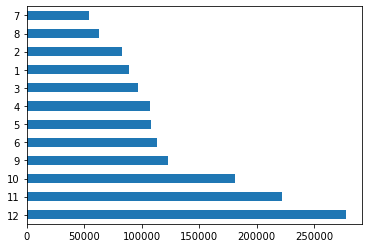

In [46]:
new_df['Start_Time'].dt.month.value_counts().plot(kind='barh')

In [47]:
((new_df.isna().sum()) / len(new_df))*100

Start_Time            0.000000
End_Time              0.000000
Severity              0.000000
City                  0.005475
State                 0.000000
Country               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Weather_Condition     2.902714
Visibility(mi)        2.916170
Humidity(%)           3.001786
Precipitation(in)    33.675953
dtype: float64

### What is the average duration of accidents?

In [48]:
duration = new_df['End_Time'] - new_df['Start_Time'] 

seconds = duration.dt.total_seconds()
hours = round(seconds // 3600)
# minutes = (seconds % 3600) // 60
# seconds = seconds % 60
hours.mean()

4.32904349684446

On average, an accident impacts traffics for 4 to 5 hours

In [49]:
with pd.option_context('display.max_rows',None):
    display(hours.sort_values(ascending=False).head(100))

1382191    25466.0
743284     23699.0
743283     23699.0
1321407    21640.0
185089     21526.0
1310437    20883.0
743281     19284.0
743273     19284.0
107268     17329.0
743276     17296.0
743286     17296.0
93087      15963.0
1384807    15948.0
1383315    15948.0
1380114    15948.0
1322799    15948.0
164452     15948.0
1380116    15948.0
97124      15674.0
163289     15628.0
94304      15580.0
65275      14003.0
85223      13373.0
54496      13119.0
53682      13119.0
1296644    13043.0
55318      13004.0
60159      12624.0
182402     12516.0
182406     12516.0
182401     12516.0
182407     12516.0
62202      12496.0
778598     10969.0
928794     10969.0
6173       10521.0
265104      9091.0
596916      9091.0
74938       9076.0
1162757     8859.0
78238       8838.0
889287      8771.0
78799       8704.0
1195533     8337.0
202909      8253.0
370245      8091.0
1380922     8031.0
141565      8001.0
505581      7245.0
973420      7044.0
1027650     7044.0
55555       6799.0
1345359     

From the above results, it seem that there are accidents that lasted over 2500 hours, which is almost 2 years. We have to look into that

I did a little research based on the given date of highest accident, https://www.jconline.com/story/news/local/lafayette/2017/12/05/65-closed-while-police-investigate-fatal-crash-lafayette-exit/924599001/

I noticed that the accident actually lasted 6 hours and not 25000 hours as the dataset led me to belive. This makes me question the validity of the remaining accidents higher than a month. I want to assume that an accident's impact does not exceed on week

In [50]:
df.iloc[1382191]

ID                                                               A-4105534
Severity                                                                 4
Start_Time                                             2017-12-05 21:05:38
End_Time                                               2020-10-31 23:59:00
Start_Lat                                                        40.452339
Start_Lng                                                       -86.846559
End_Lat                                                          40.417671
End_Lng                                                         -86.821061
Distance(mi)                                                         2.745
Description              Closed between IN-43/Exit 178 and IN-26/Exit 1...
Street                                                              I-65 S
Side                                                                     R
City                                                             Lafayette
County                   

## What time of day did most accidents occur?

In [51]:
new_df.head()

,Start_Time,End_Time,Severity,City,State,Country,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Weather_Condition,Visibility(mi),Humidity(%),Precipitation(in)
0,2016-02-08 00:37:08,2016-02-08 06:37:08,3,Dublin,OH,US,False,False,False,False,False,False,Light Rain,10.0,58.0,0.00
1,2016-02-08 05:56:20,2016-02-08 11:56:20,2,Dayton,OH,US,False,False,False,False,False,False,Light Rain,10.0,91.0,0.02
2,2016-02-08 06:15:39,2016-02-08 12:15:39,2,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
3,2016-02-08 06:15:39,2016-02-08 12:15:39,2,Cincinnati,OH,US,False,False,False,True,False,False,Overcast,10.0,97.0,0.02
4,2016-02-08 06:51:45,2016-02-08 12:51:45,2,Akron,OH,US,False,False,False,False,False,False,Overcast,10.0,55.0,NaN


In [52]:
# Getting the value count of the hours per day
total_acc_hour = new_df.Start_Time.dt.hour.value_counts().sort_index()
total_acc_hour

0      46125
1      43434
2      38801
3      32175
4      29478
5      40105
6      57859
7      73938
8      75802
9      59744
10     50442
11     51884
12     72283
13     83700
14     90162
15    100074
16    105559
17    108011
18     91413
19     65190
20     53515
21     48988
22     49156
23     48226
Name: Start_Time, dtype: int64

The above is not too readable, so i'm formatting it

In [53]:
def formatting(x):
    x = int(x) + 1
    if x > 12:
        x = str(x - 12) + ' PM'
        return x
    else:
        return str(x) + ' AM'

In [54]:
total_acc_hour.index=list(map(formatting,total_acc_hour.index))

In [55]:
total_acc_hour

1 AM      46125
2 AM      43434
3 AM      38801
4 AM      32175
5 AM      29478
6 AM      40105
7 AM      57859
8 AM      73938
9 AM      75802
10 AM     59744
11 AM     50442
12 AM     51884
1 PM      72283
2 PM      83700
3 PM      90162
4 PM     100074
5 PM     105559
6 PM     108011
7 PM      91413
8 PM      65190
9 PM      53515
10 PM     48988
11 PM     49156
12 PM     48226
Name: Start_Time, dtype: int64

<AxesSubplot:>

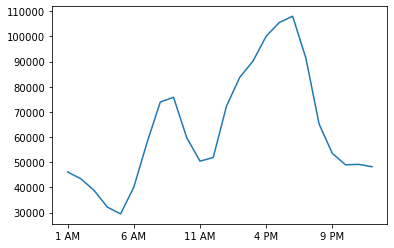

In [56]:
total_acc_hour.plot()

From the plot above, the rates if of accidents drop steadily from 1am to 5am. The accident rate steadily increases from 6am 

From this, i can say that lesser people are on the road by 1am and people start getting out for work by 6am. 
The accident rate starts to drop after 4pm, indicating that people are getting back from work

In [57]:
with pd.option_context('display.max_columns',None):
    display(df.head())

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


## What is the percentage of severity of accidents

<AxesSubplot:ylabel='Severity'>

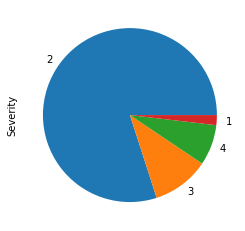

In [58]:
new_df.Severity.value_counts().plot(kind='pie')

In [59]:
new_df['Severity'].isna().sum()

0

There were no null values

The numbers 1 to 4 represent the severity of the accident, 1 being the least impact and 4 the higest impact

The above is okay, but i'm intrested in looking at a specific state, Los Angeles

In [62]:
la_df = new_df.query("City == 'Los Angeles'")

<AxesSubplot:ylabel='Severity'>

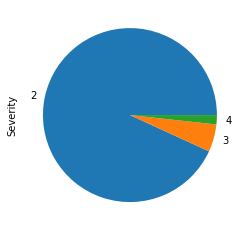

In [64]:
la_df.Severity.value_counts().plot(kind='pie')

Wow, seems like there were a minimum of level 2 accidents, thought the pattern is consistent with that of the total dataset

## Where do accidents occur mostly (Bumps, Crossing,...)

In [67]:
points_df = new_df[['Bump','Crossing','Junction','Railway']]
points_df.sum()

Bump           261
Crossing     86383
Junction    204498
Railway      12584
dtype: int64

Looks like accidents occur mostly at road junctions

## Questions to answer
1. What the is average duration of accidents
2. What is the highest duration of an accident
3. Which state has the higest accident
4. What was the weather condition at most of the accident
5. What time of the day did the accidents occur
6. What are the percentage of occurence of severe accidents
7. Where to accidents occur mostly ('Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway')